In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

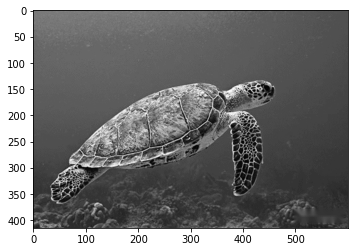

In [17]:
img = cv2.imread("img/turtle.jpg", 0)
plt.imshow(img, cmap = 'gray')

In [23]:
rows, cols = img.shape
# 影像二維畫素轉換為一維
data = img.reshape((rows * cols, 1))
data = np.float32(data)
data.shape

(249000, 1)

In [30]:
# 定義算法終止的條件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 設定標籤
flags = cv2.KMEANS_RANDOM_CENTERS

In [40]:
# K-Means聚類 聚整合2類
'''
data: input data
K: 聚類個數
bestLabels: 表示計算之後各個數據點的最終的分類索引。
criteria: 算法終止的條件。
attempts: 表示爲了獲得最佳的分類效果，算法要不同的初始分類嘗試次數。
flags: 表示選擇初始中心點選擇方法用哪一種。
'''
compactness, labels, centers = cv2.kmeans(data, 2, None, criteria, 10, flags)

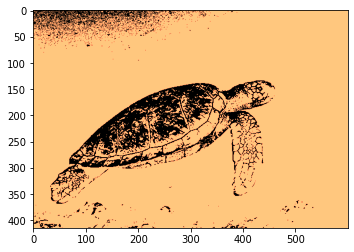

In [46]:
# 生成 K-Means影像
dst = labels.reshape((img.shape[0], img.shape[1]))
plt.imshow(dst,'copper')